Linear models make a prediction using a linear function of the input features.  

A linear model is generally in the format of `ŷ = w[0] * x[0] + b` which is the formula for a line. In this case, `ŷ` is the prediction made by the model, `w[0]` is the slope, and `b` is the y-axis offset.  

The above formula has just a single feature, but for a model with multiple features, the equation is this: `ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b`, which is essentially a weighted average of each of the features.

In [48]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

def pretty():
    sns.set_palette('pastel')
    sns.set_style('ticks')
    sns.set_context('talk', font_scale=1)

    sns.despine(offset=10, trim=True, bottom=True)
    plt.tick_params(labelbottom=True, bottom=False)
    
def legend():
    plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1),
           ncol=1) # no legend overlap

# Linear models for regression

Here the wave data is used to predict a linear regression. It is an assumption with a linear model that the target y is a linear combination of the features within the data. This may be unrealistic in many cases, but it can often be quite accurate.  

For datasets that have many features linear models can be quite helpful, as any dataset that has more features than data oints, the target y can be perfectly modeled as a linear function.

w[0]: 0.393906  b: -0.031804


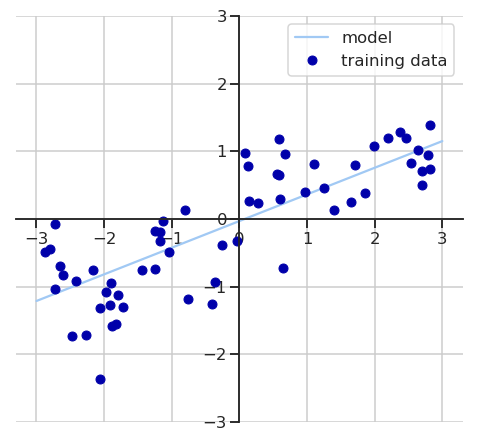

In [4]:
mglearn.plots.plot_linear_regression_wave()

Linear regression, or ordinary least squares (OLS), is the simplest and most classic linear method for regression. Linear regression finds the parameters w and b that minimize the mean squared error between predictions and the true regression targets, y, on the training set. The mean squared error is the sum of the squared differences between the predictions and the true values, divided by the number of samples.  

The following code produces the model shown above. The variables that have a trailing `_` are used by scikit-learn to differentiate between values set by model derivations and those set by the user.  


`lr.coef_` is an array that contains a slope for each feature, while the `lr.intercept` is always a single float value.

In [12]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


Here the accuracy of the model is not great, with and R-squared of ~0.66, however, the training and test sets are similar, which is often indicative of underfitting.  

With a dataset like the wave data, there are a small number of features, and this reduces the risk of overfitting, but as the number of features grows, so too does the risk of overfitting.

In [13]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


The Boston housing dataset has many more features (105) and a limited number of samples (506) which increases the overfitting risk. The discrepancy between the training and test sets is a clear sign of overfitting.

In [15]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


Ridge regression is also a linear model for regression, so the formula it uses to make predictions is the same one used for ordinary least squares. In ridge regression, though, the coefficients (w) are chosen not only so that they predict well on the training data, but also to fit an additional constraint. We also want the magnitude of coefficients to be as small as possible; in other words, all entries of w should be close to zero. Intuitively, this means each feature should have as little effect on the outcome as possible (which translates to having a small slope), while still predicting well. This constraint is an example of what is called regularization. Regularization means explicitly restricting a model to avoid overfitting. The particular kind used by ridge regression is known as L2 regularization.  

Here, the training set score of Ridge is lower than for LinearRegression , while the test set score is higher. This is consistent with our expectation. With linear regression, we were overfitting our data. Ridge is a more restricted model, so we are less likely to overfit. A less complex model means worse performance on the training set, but better generalization.

In [16]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


The ridge model makes a trade-off between the simplicity of the model and the performance on the training set. The alpha parameter can be used to specify how simple the model should be. The higher the alpha, the more simplistic the resulting model will be, and therefore the less likely it will be to overfit the data.  

The default alpha is 1.

In [17]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


With small values of alpha, the model becomes much less restricted, and more closely resembles a simple linear regression model.

In [18]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


The following plot illustrates the difference between three different alpha values, where an alpha of 1 results in the `coef_` values being closer to a slope of zero and the lower alpha values result in `coef_` values existing much further away from zero.  

The way the data is displayed here is that the x=1 is the first feature, and x=2 is the second feature etc. and the y-axis displays the `coef_` value.

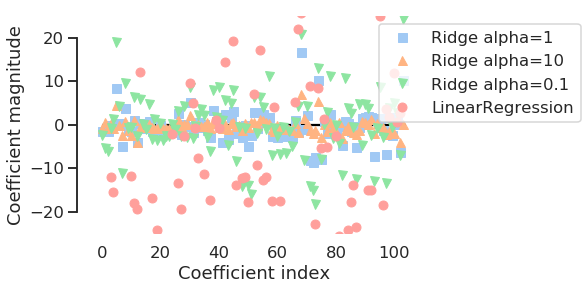

In [22]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()
pretty()
legend()

Here is another way at evaluating the effect of altering the alpha. In this plot, the size of the Boston housing data is changed and the R-squared values of the linear models are displayed.  

In this plot it can be seen how with each increase in the size of the dataset, the regularization becomes increasingly less important. It can also be seen that as the size of the dataset increases, it becomes more difficult for the model to overfit the training set, as shown by the decreasing R-squared value of the training set.

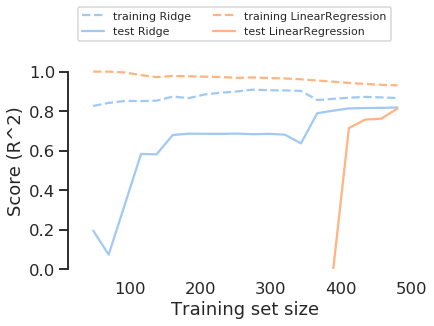

In [24]:
mglearn.plots.plot_ridge_n_samples()
pretty()

Lasso regularization is an alternative to Ridge regularization, which also restricts slope coefficients to bring them closer to zero using a method called L1 regularization. One major difference is the L1 regularization brings some coefficients to exactly zero, meaning that some of the features are entirely ignored. This can be helpful in revealing the most important features of the model.  

Here the model performs quite poorly with a an alpha of 1.

In [25]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


Reducing the alpha will allow increased fitting of the data.  

Here the model only uses 33 features of the data and scores even a bit better than the Ride regularization.

In [26]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


As the alpha is further reduced, signs of overfitting become apparent.

In [27]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Here is a comparison between the two model types.  

In practice, typically the Ridge model is first used, but scikit-learn also has an `ElasticNet` class which combines the penalties from both the Lasso and the Ridge modeling to fit a good model to the data.

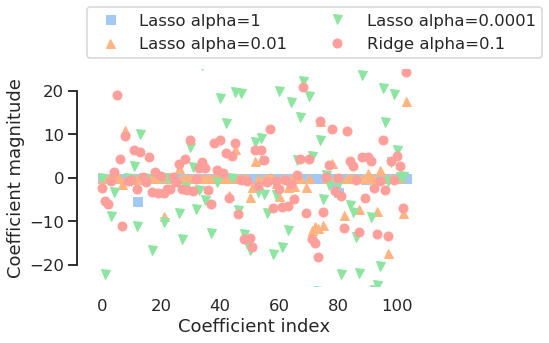

In [49]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
pretty()

# Linear models for classification
Classification models are conceptually similar to regression models, with the major difference that they attempt to separate data into two classifications (or more, depending on the number of features being used) rather than just fit a function to the data.  

The two most common linear classification algorithms are logistic regression, implemented in linear_model.LogisticRegression , and linear support vector machines (linear SVMs), implemented in svm.LinearSVC (SVC stands for support vector classifier). Despite its name, LogisticRegression is a classification algorithm and not a regression algorithm, and it should not be confused with LinearRegression.  

By default both the LinearSVC and the LogisticRegression apply an L2 regularization in the same way that Ridge does.

/home/alex/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
/home/alex/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/alex/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


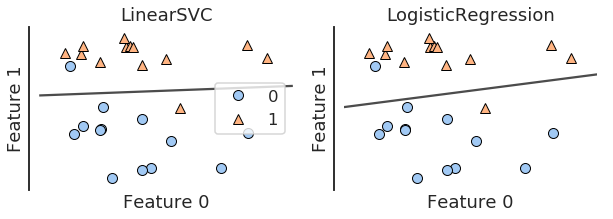

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()
pretty()

The trade-off parameter that controls regularization is called C, where lower values of C correspond with greater regularization.  

In the following plots, when `C == 1000`, the model is likely overfitting because it is dramatically affected by the two points that seem to be commonly misclassified.

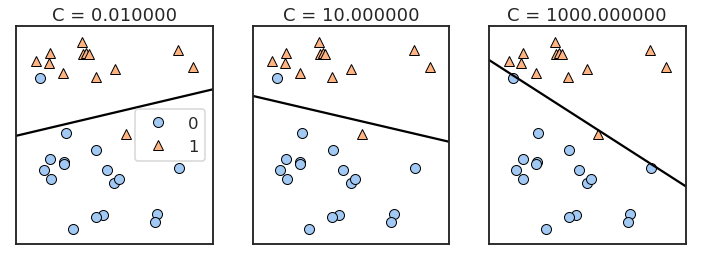

In [60]:
mglearn.plots.plot_linear_svc_regularization()

Here LogisticRegression is used on the Breast cancer dataset.  

While the results are quite good with `C==1`, because the training and test set performance ar so close, it is likely that the model is underfitting the data.

In [61]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.958


/home/alex/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Here, the test accuracy is slightly improved by using a more complex model.

In [67]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.967
Test set score: 0.965


/home/alex/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


A more regularized model performs much worse, as expected from the more complex model working so well above.

In [68]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


/home/alex/anaconda3/envs/ml/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Here is a display of the different regularization settings.

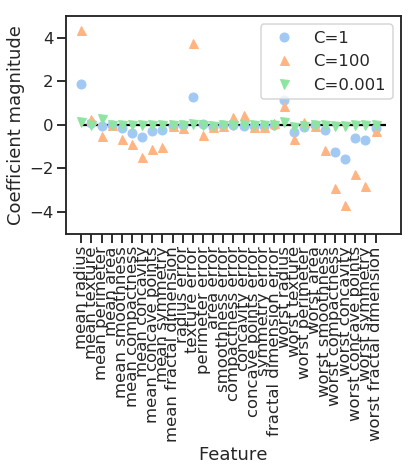

In [69]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

64